# OLG model with one-child policy

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import OLGClass
model = OLGClass(do_print=False)

# OLG (Overlapping Generations) model

Our model project examines the Overlapping Generations (OLG) model.

The OLG model in this assignment is based on the OLG model described in the lectures. In our model we allow a population growth rate which is not included in the OLG model from the lectures. In our model a one-child policy is introduced in after 20 periods and the population growth rate become negative. First we examines the model without the policy and then we examines with the policy.

In our model the population growth rate is 5 pct. each period and the probability for young to be old is 98 pct. When the policy is introduced the population growth rate will become negative (-5 pct.)

## Model setup

A household is living in two periods. The chance of surviving and live in the second period is 98 pct. 
$$
\begin{aligned}
L_t & = L_{t-1}(1+n) \\ 
\text{with}\ n &>-1
\end{aligned}
$$
</font>

$$
\begin{aligned}
L_{old(t)} & = L_{young(t-1)}*SR \\ 
\text{with}\ 0<SR=<1
\end{aligned}
$$
</font>

Where SR is the chance of living in the second period. Only the young population works in the model and their consumption in the second period depends on how much they have saved up while they were young

**Households**: In our model we have full employment so the labor market clear for the young population and earn after tax $(1-\tau_w)w_{t}$. The after tax return on savings as old is $(1-\tau_{r})r_{t+1}$.

Utility is given by:
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{1t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$
    
The problem is formulated in terms of the saving rate $s_t\in[0,1]$.

**Firms:** Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$,
and hires labor $N_{t}$ at the wage rate $w_{t}$. Firms have access
to the CES production function:
$$
\begin{aligned}
Y_{t}=F(K_{t-1},L_{t})= \left( \gamma K_{t-1}^{-\theta}+(1-\gamma)L_{t}^{-\theta} \right)^{\frac{1}{-\theta}},\,\,\,\theta>-1,\gamma\in(0,1)
\end{aligned}
$$

We'll focus on the special case of Cobb-Douglas production function first in our model and then later we change the parameters:

$$
\begin{aligned}
Y_{t}=F(K_{t-1},L_{t})=A_tK_{t-1}^{\alpha}L_{t}^{1-\alpha}
\end{aligned}
$$

    
Profits are given by:
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Government:** Choose public consumption, $G_{t}$, and tax rates $\tau_w \in [0,1]$ on labor and $\tau_r \in [0,1]$ on capital. Total tax revenue is given by:
    
$$
\begin{aligned}
T_{t} &=\tau_r r_{t} (K_{t-1}+B_{t-1})+\tau_w w_{t}   
\end{aligned}
$$
    
Government debt accumulates according to
    
$$
\begin{aligned}
B_{t} &=(1+r^b_{t})B_{t-1}-T_{t}+G_{t} 
\end{aligned}
$$
       
A *balanced budget* implies $G_{t}=T_{t}-r_{t}B_{t-1}$.

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital

    $$
    r_{t}=r_{t}^{K}-\delta=r_{t}^{b}
    $$

4. Labor market clears: $L_{t}=N_{t}$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
6. Asset market clears: $S_{t}=K_{t}+B_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

Where $I_{t}$ is investment.

In out py.file we have choosen the initial values for our parameters:
1. CRRA coefficient            = 2
2. Discount factor             = 0.95
3. Production function         = Cobb-Douglas
4. Capital weight              = 0.5
5. Substitution parameter      = 0
6. Depreciation rate           = 0.5
7. Tax in labor income         = 0.35
10. Tax on capital income      = 0.2
11. Initial capital stock      = 0.5
12. Initial government debt    = 0
13. Length of simulation       = 50
14. Population growth rate before the policy = 0.05
15. Population growth rate after the policy  = -0.05
16. Probability of surviving (becoming old)  = 0.98
17. Initial population = 1


We simulate the model and see how the population will devolp throughout the period with our inital values:


optimal saving rate in period 49 = 0.311240


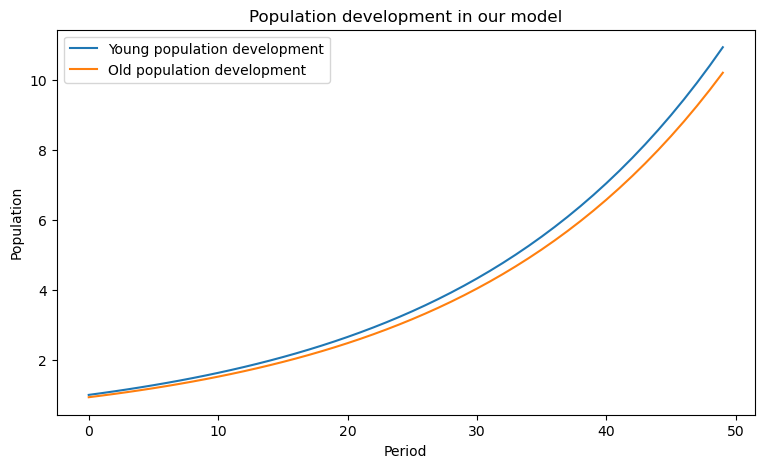

In [2]:
# Simulate the model
model.simulate(do_print=False)

# Saving the values for later comparison with changed parameter values
K_lag_old = model.sim.K_lag.copy()
k_lag_old = model.sim.k_lag.copy()

# Graph the population development in our model
plt.figure(figsize=(9, 5))
plt.plot(range(model.par.simT), model.par.p_young, label="Young population development")
plt.plot(range(model.par.simT), model.par.p_old, label="Old population development")
plt.xlabel("Period")
plt.ylabel("Population")
plt.legend()
plt.title("Population development in our model")
plt.show()

From the plot above we see that our country, are experiencing a rapid population growth, prompting the government to consider implementing a one-child policy as a measure to control the population. Moreover, our initial model reveals that the optimal savings rate at the end of the period is determined to be 0.31 (31 percent).

Graphically, we analyze the development of capital and capital per worker in our model:

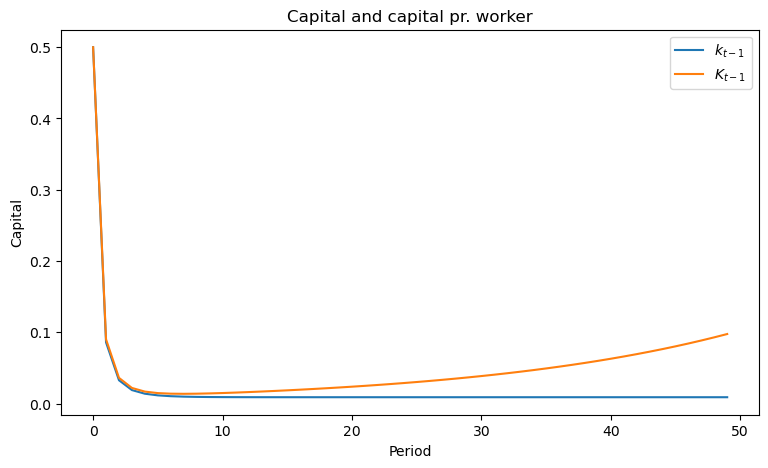

In [3]:
# Graph capital and capital pr. worker 
plt.figure(figsize=(9, 5))
plt.plot(range(model.par.simT), model.sim.k_lag, label=r"$k_{t-1}$")
plt.plot(range(model.par.simT), model.sim.K_lag, label=r"$K_{t-1}$")
plt.xlabel("Period")
plt.ylabel("Capital")
plt.legend()
plt.title("Capital and capital pr. worker")
plt.show()

Upon examination, we observe that while capital does not converge to a steady state in our model, capital per worker does. This disparity arises due to the inclusion of population growth in our model, causing capital per worker to approach a stable equilibrium over time.

We now check out model with different parameter values:

The households discount factor increases with 0.15 to 0.8

The firms weight on capital decreases by 0.2 and the depreciation rate also decreases by 0.2

The government is active and they decrease tax on labor with 0.1 and increase tax on capital with 0.1.


optimal saving rate in period 49 = 0.400718


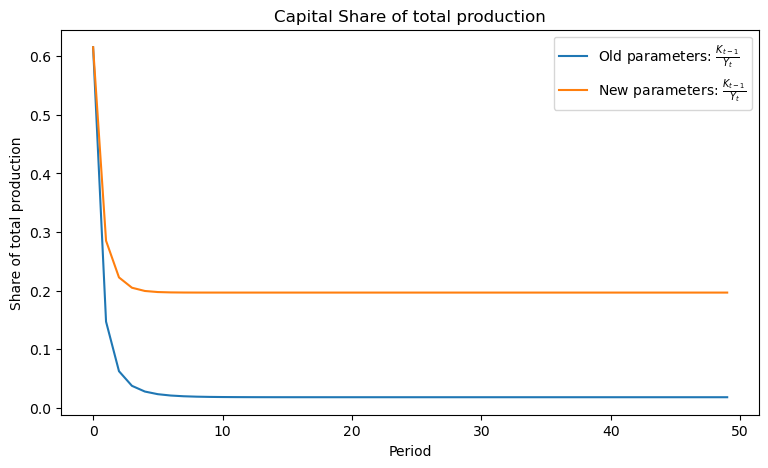

In [4]:
# Setting new parameters

# i. Household
model.par.beta = 0.8 # Discount factor - Increased by 0.15

# ii. Firms
model.par.alpha = 0.30 # Capital weight - Decreased by 0.2
model.par.delta = 0.30 # Depreciation rate - Decreased by 0.2

# iii. Government
model.par.tau_w = 0.25 # Labor income tax - Decreased by 10 pct.
model.par.tau_r = 0.30 # Capital tax - Increased by 10 pct.

model.simulate(do_print=False)

# b. Graph capital share of total income
plt.figure(figsize=(9, 5))
plt.plot(range(model.par.simT), K_lag_old/model.sim.Y, label=r"Old parameters: $\frac{K_{t-1}}{Y_t}$")
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"New parameters: $\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share of total production")
plt.legend()
plt.title("Capital Share of total production")
plt.show()

The adjustments in the parameters lead to an increase in the capital share of total production, resulting in the convergence towards a higher level of steady state for the capital share.

Following the parameter changes, the optimal savings rate rises to 0.4 (40 percent). This primarily stems from the higher discount factor, as the household places a greater value on consumption in period 2.

# One child policy

The government instead of changing the tax rates imposes a one-child policy to stop the high population growth rate in period 20. This policy only allows parents to have one child and this make the population growth rate negative. In our model we estimate that the new policy will result in a negative growth rate at -0.01 (-1 pct.).

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

optimal saving rate in period 49 = 0.319321


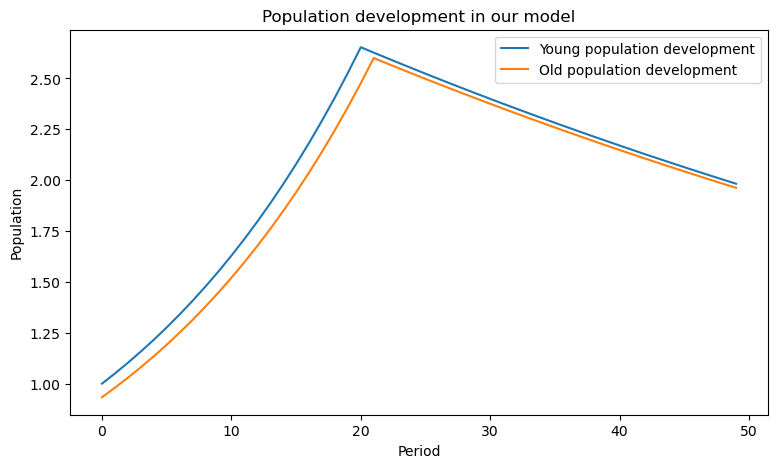

In [5]:
# Resetting the model
%load_ext autoreload
%autoreload 2

# Loading local modules
from modelproject import OLGClass
model = OLGClass(do_print=False)

# Imposing the policy
model.par.n = np.full(model.par.simT, 0.05) # Population growth rate before the policy
model.par.n[20:] = -0.01 # Population growth rate after the policy

# Simulate the model
model.simulate(do_print=False)

# Saving the values for later comparison with changed parameter values
K_lag_old = model.sim.K_lag.copy()
k_lag_old = model.sim.k_lag.copy()

# Graph the population development in our model
plt.figure(figsize=(9, 5))
plt.plot(range(model.par.simT), model.par.p_young, label="Young population development")
plt.plot(range(model.par.simT), model.par.p_old, label="Old population development")
plt.xlabel("Period")
plt.ylabel("Population")
plt.legend()
plt.title("Population development in our model")
plt.show()

After the introduction of the on child policy, a noticeable decrease in population growth becomes evident. Despite this change, the optimal savings rate remains nearly unchanged at 0.32 (32 percent).

We want to check if the policy has an effect on the capital and the capital pr. worker:

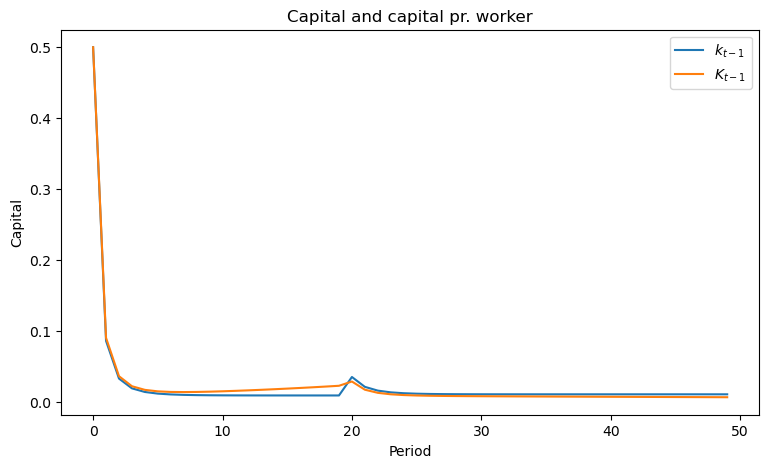

In [6]:
# Graph the capital and capital pr. worker over time with one-child policy
plt.figure(figsize=(9, 5))
plt.plot(range(model.par.simT), model.sim.k_lag, label=r"$k_{t-1}$")
plt.plot(range(model.par.simT), model.sim.K_lag, label=r"$K_{t-1}$")
plt.xlabel("Period")
plt.ylabel("Capital")
plt.legend()
plt.title("Capital and capital pr. worker")
plt.show()

Upon the implementation of the policy, we observe a spike in capital per worker, primarily attributed to the slower depreciation of capital compared to the policy's immediate effect on the population. Consequently, with fewer individuals sharing the same amount of capital, the capital per worker experiences a notable increase. However, over time, the total capital diminishes. Furthermore, we note that the policy leads to a slightly higher capital per worker compared to the pre-policy scenario.

We examine whether the results for the one-child policy differ when considering the new parameters we previously evaluated.


optimal saving rate in period 49 = 0.405776


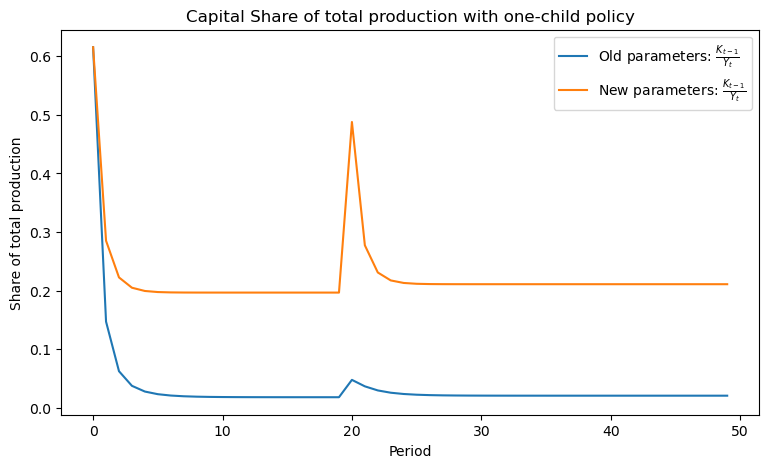

In [7]:
# Setting new parameters

# i. Household
model.par.beta = 0.8 # Discount factor - Increased by 0.15

# ii. Firms
model.par.alpha = 0.30 # Capital weight - Decreased by 0.2
model.par.delta = 0.30 # Depreciation rate - Decreased by 0.2

# iii. Government
model.par.tau_w = 0.25 # Labor income tax - Decreased by 10 pct.
model.par.tau_r = 0.30 # Capital tax - Increased by 10 pct.

model.simulate(do_print=False)

# Graph the capital share of total production
plt.figure(figsize=(9, 5))
plt.plot(range(model.par.simT), K_lag_old/model.sim.Y, label=r"Old parameters: $\frac{K_{t-1}}{Y_t}$")
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"New parameters: $\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share of total production")
plt.legend()
plt.title("Capital Share of total production with one-child policy")
plt.show()

When analyzing the one-child policy with the new parameters, we observe a significantly larger immediate effect compared to the previous parameters. However, over time, we find that the policy converges towards a slightly higher steady state, which aligns with the steady state observed with the old parameters, despite the lower initial impact.

The one-child policy demonstrates its intended effect by successfully reducing population growth. However, it is crucial to acknowledge that this policy should only be implemented for a limited duration; otherwise, it could lead to the eventual demise of the economy. Additionally, we observe that capital per worker experiences a slight increase following the introduction of the policy.